In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

data = pd.read_csv('network_trafiic_dataset.csv')



data = data.drop(['No.','Info'], axis=1)



data = pd.get_dummies(data, columns=['Source','Destination','Protocol'])

scaler = StandardScaler()
data[['Time', 'Length']] = scaler.fit_transform(data[['Time', 'Length']])

data['label'] = np.where(data.index > len(data) * 0.8,1,0)

x = data.drop('label', axis=1)
y = data['label']

x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(x_train.shape, x_val.shape, x_test.shape)


(275895, 698) (59120, 698) (59121, 698)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     47189
           1       1.00      1.00      1.00     11932

    accuracy                           1.00     59121
   macro avg       1.00      1.00      1.00     59121
weighted avg       1.00      1.00      1.00     59121



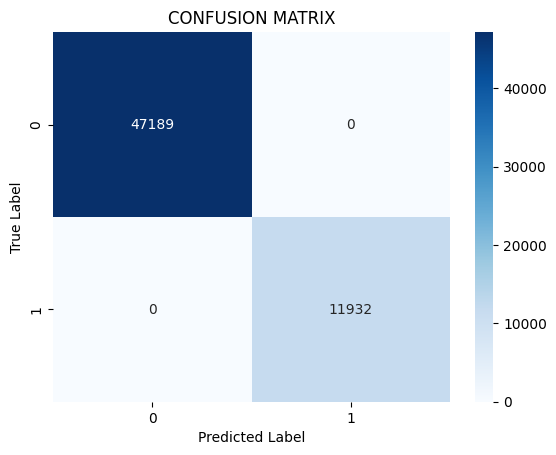

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CONFUSION MATRIX")
plt.show()